# **2022 MLB batting stats (from [Baseball Reference](https://www.baseball-reference.com/) data)**
- name: complete name
- age: age
- tm: MLB Team
- lg: American League or National League
- g: games played
- pa: plate apparences
- ab: At bat
- r: Runs
- h: hits 
- 2b: double base
- 3b: Triple base
- HR: Home Runs 
- RBI: Runs Batted In
- SB: Stolen Bases
- CS: Caught Stealing
- BB: Bases on Balls/Walks
- SO:  Strikeouts
- BA:  Hits/At Bats
- OBP: On-base percentage
- SLG: Slugging(calculated by dividing the total number of bases by the number of at bats)
- OPS: On-base plus slugging(combine how well a hitter can reach base)
- OPS+: player's on-base plus slugging percentage and normalizes the number across the entire league
- TB: Total Bases
- HBP: Times Hit by a Pitch.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:

baseball_sp1 = pd.read_csv('baseball.csv')
baseball_sp1.drop('Rk', axis=1, inplace=True)
baseball_sp1.columns = map(str.lower, baseball_sp1.columns)

baseball_sp = baseball_sp1[baseball_sp1['tm'] != 'TOT'].copy()
baseball_sp.reset_index(drop=True, inplace=True)
baseball_sp['name'] = baseball_sp['name'].str.replace(r'[#*.]+$', '', regex=True)
baseball_sp.head(10)



,name,age,tm,lg,g,pa,ab,r,h,2b,...,ops,ops+,tb,gdp,hbp,sh,sf,ibb,pos summary,name-additional
0,CJ Abrams,21,SDP,NL,46,139,125,16,29,5,...,0.605,76.0,40,4,6,2,2,0,64/H9D,abramcj01
1,CJ Abrams,21,WSN,NL,44,163,159,17,41,7,...,0.603,75.0,52,1,3,0,0,0,6/H,abramcj01
2,Albert Abreu,26,KCR,AL,1,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,/1,abreual01
3,José Abreu,35,CHW,AL,157,679,601,85,183,40,...,0.824,133.0,268,19,12,0,4,2,*3D,abreujo02
4,Ronald Acuna Jr,24,ATL,NL,119,533,467,71,124,24,...,0.764,112.0,193,8,10,0,3,4,9D/H8,acunaro01
5,Willy Adames,26,MIL,NL,139,617,563,83,134,31,...,0.756,112.0,258,11,1,0,4,3,*6/DH,adamewi01
6,Riley Adams,26,WSN,NL,48,155,142,14,25,4,...,0.555,60.0,44,2,1,0,0,0,2/HD3,adamsri03
7,Jo Adell,23,LAA,AL,88,285,268,22,60,12,...,0.637,78.0,100,6,4,0,1,0,79H/D,adelljo01
8,Ehire Adrianza,32,WSN,NL,31,94,84,5,15,2,...,0.458,36.0,17,2,1,0,1,0,5/7H46D1,adriaeh01
9,Ehire Adrianza,32,ATL,NL,6,16,13,3,2,1,...,0.543,55.0,3,0,0,0,0,0,/456,adriaeh01


## The average Age is **27.9** 

In [3]:
average_age = baseball_sp['age'].mean()
average_age_rounded = round(average_age, 1)
print("The average age is " + str(average_age_rounded))

The average age is 28.0


## ***218*** players under ***25***
## ***444*** players between ***26-31*** 
## ***128*** players over ***32*** 

In [4]:



players_25 = baseball_sp[baseball_sp['age'] <= 25]
players_32 = baseball_sp[baseball_sp['age'] >= 32]
players_2631 = baseball_sp[(baseball_sp['age'] >= 26) & (baseball_sp['age'] <= 31)]
players_tot = baseball_sp[baseball_sp['tm'] == 'TOT']
num_players_under_25 = len(players_25)
num_players_32 = len(players_32)
num_players_2631 = len(players_2631)
num_players_tot = len(players_tot)
print(num_players_under_25)
print(num_players_2631)
print(num_players_32)
print(num_players_tot)
avg_games_under_25 = players_25['g'].mean()
avg_games_26_to_31 = players_2631['g'].mean()
avg_games_over_32 = players_32['g'].mean()
print(avg_games_26_to_31, avg_games_over_32, avg_games_under_25)
#for index, row in players_25.iterrows():
    #print("Name:", row['name'])
    #print("Team:", row['tm'])
    #print()

230
509
146
0
56.00196463654224 60.178082191780824 56.495652173913044


---
# Players with 30 or more HRs in the 2022 MLB season

In [5]:
more_hr_players = baseball_sp[baseball_sp['hr'] >= 30].nlargest(5, 'hr')
count = len(more_hr_players)
strikeout_rate = more_hr_players['so'] / more_hr_players['pa']  
average_strikeout_rate = strikeout_rate.mean()
average_ops = more_hr_players['ops'].mean()


print("Average Strikeout Rate for players with 30+ home runs:", average_strikeout_rate)
print("Average OPS for players with 30+ home runs:", average_ops)

print(more_hr_players[['name','rbi', 'hbp', 'hr', 'ab', 'ops']])
print("Total players with 30 or more home runs:", count)

Average Strikeout Rate for players with 30+ home runs: 0.25164662286257394
Average OPS for players with 30+ home runs: 0.9368000000000001
               name  rbi  hbp  hr   ab    ops
405     Aaron Judge  131    6  62  570  1.111
720  Kyle Schwarber   94    4  46  577  0.827
27      Pete Alonso  131   12  40  597  0.869
813      Mike Trout   80    6  40  438  0.999
673    Austin Riley   93   17  38  615  0.878
Total players with 30 or more home runs: 5


---
# Players with 70 or more RBI(Runs Batted In)

In [6]:
more_rbi_players = baseball_sp[baseball_sp['rbi'] >= 70]
count1 = len(more_rbi_players)
print(more_rbi_players[['name','tm', 'so', 'rbi', 'ops']])
print( count1)



                 name   tm   so  rbi    ops
3          José Abreu  CHW  110   75  0.824
5        Willy Adames  MIL  166   98  0.756
27        Pete Alonso  NYM  128  131  0.869
32     Yordan Alvarez  HOU  106   97  1.019
46      Nolan Arenado  STL   72  103  0.891
..                ...  ...  ...  ...    ...
827    Daulton Varsho  ARI  145   74  0.745
828     Andrew Vaughn  CHW   96   76  0.750
834      Alex Verdugo  BOS   86   74  0.732
850  Christian Walker  ARI  131   94  0.804
871        Bobby Witt  KCR  135   80  0.722

[65 rows x 5 columns]
65


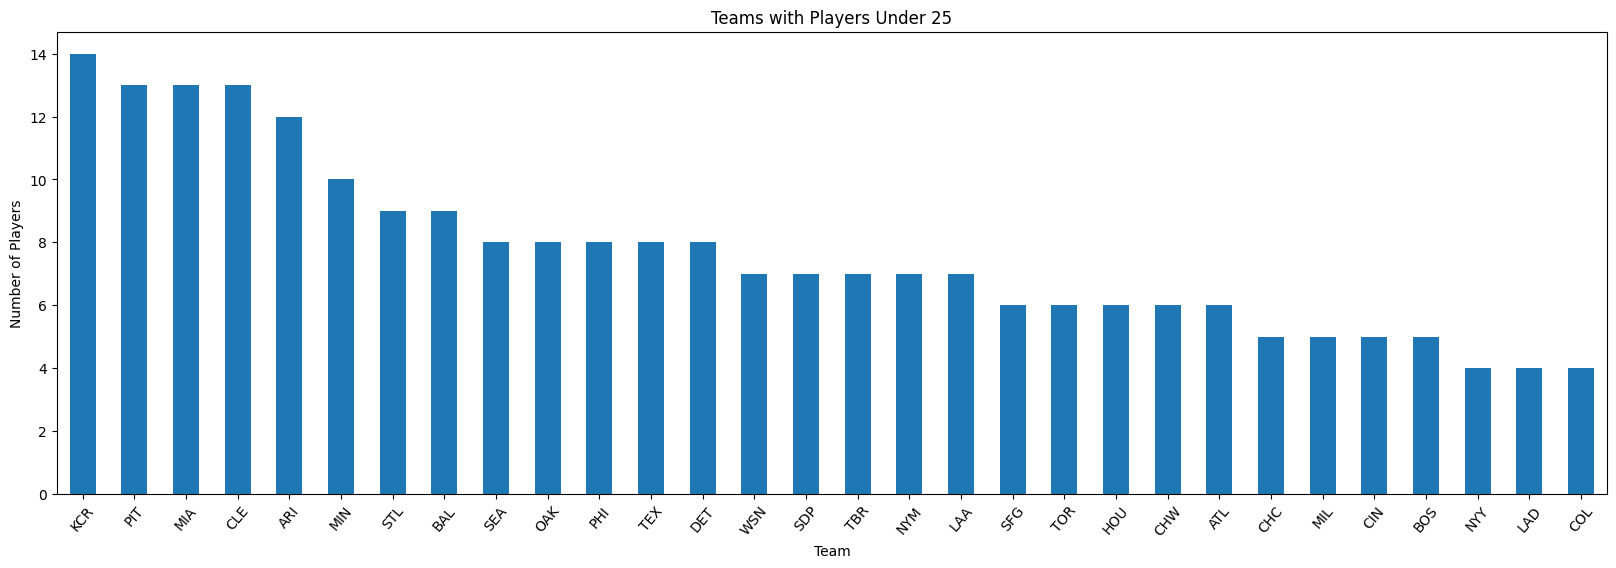

In [7]:
team_counts = players_25['tm'].value_counts()
plt.figure(figsize=(20, 6))
team_counts.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.title('Teams with Players Under 25')
plt.xticks(rotation=50)
plt.show()

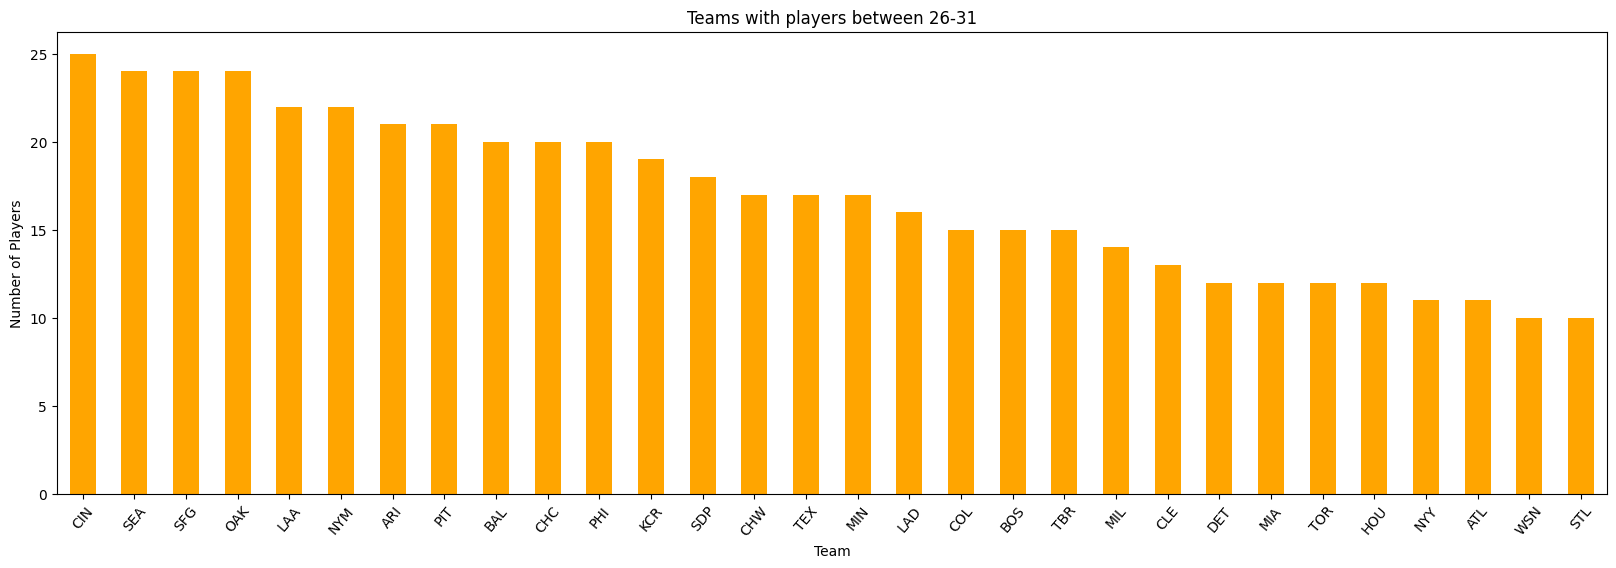

In [8]:
team_counts1 = players_2631['tm'].value_counts()
plt.figure(figsize=(20, 6))
team_counts1.plot(kind='bar', color='orange')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.title('Teams with players between 26-31')
plt.xticks(rotation=50)
plt.show()

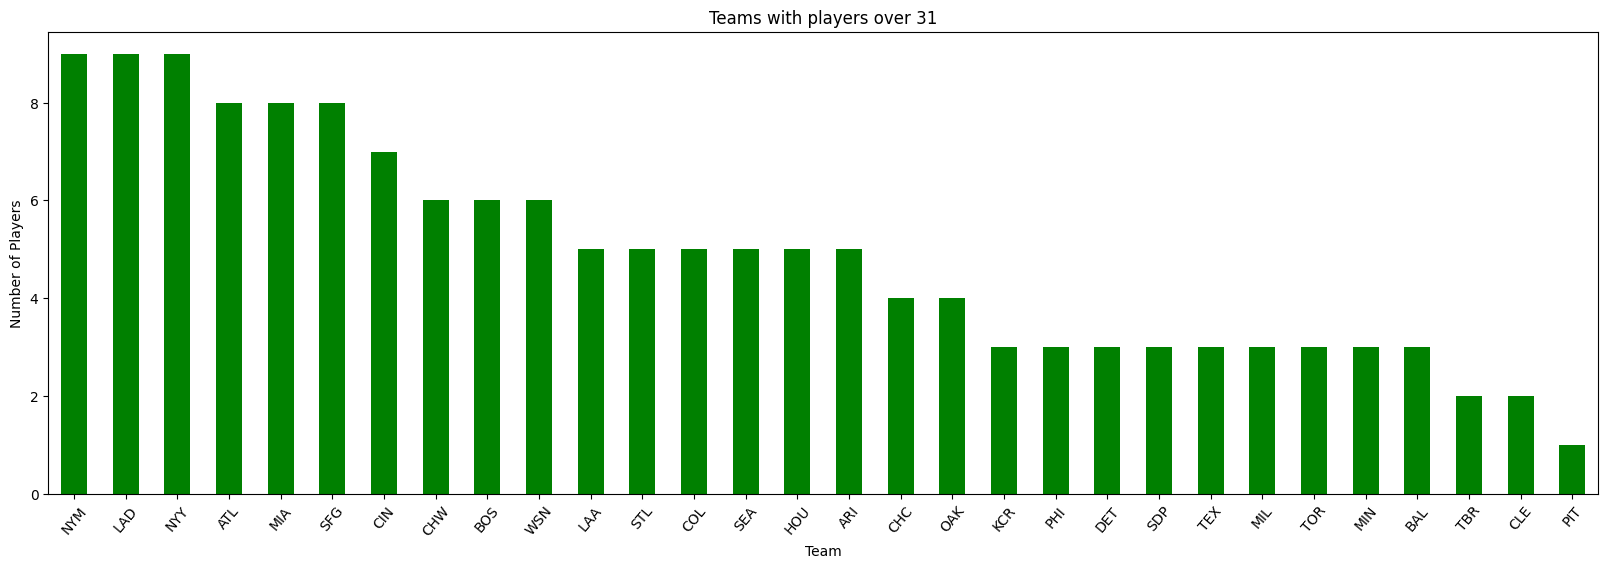

In [9]:
team_counts2 = players_32['tm'].value_counts()
plt.figure(figsize=(20, 6))
team_counts2.plot(kind='bar', color='green')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.title('Teams with players over 31')
plt.xticks(rotation=50)
plt.show()

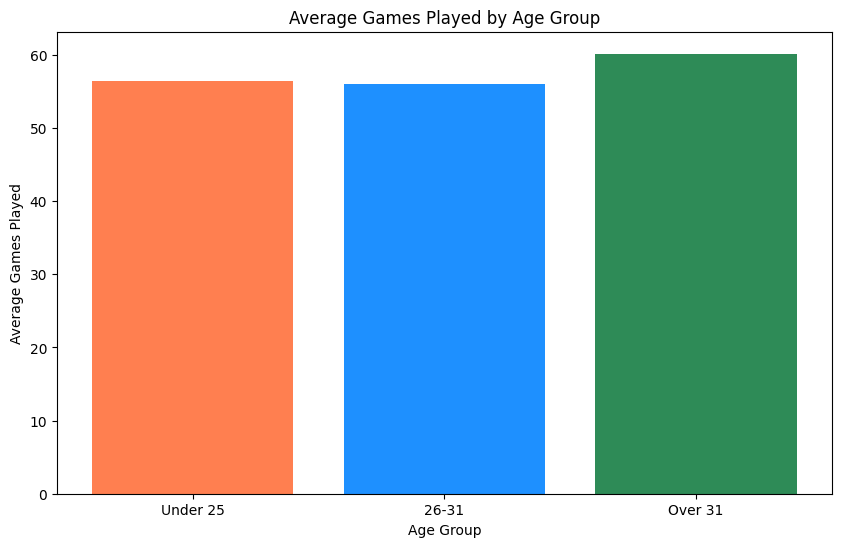

In [10]:
age_groups = ['Under 25', '26-31', 'Over 31']
average_games = [avg_games_under_25, avg_games_26_to_31, avg_games_over_32]
bar_colors1 = ['coral', 'dodgerblue', 'seagreen']
plt.figure(figsize=(10, 6))
plt.bar(age_groups, average_games, color= bar_colors1)
plt.xlabel('Age Group')
plt.ylabel('Average Games Played')
plt.title('Average Games Played by Age Group')
plt.show()

In [11]:
combined_counts = pd.DataFrame({
    'Under 25': team_counts,
    '26-31': team_counts1,
    'Over 31': team_counts2
}).fillna(0)

 
 ---
 - The most prominent group in every team are the ***26-31***, because in general, in this age range, players have the best conditions to show their best version in the ***MLB***.
 ---
 - ***Braves(ATL), Marlins(MIA) and Nationals(WSN)*** are the teams with age groups distributed almost equally.

<Figure size 2000x600 with 0 Axes>

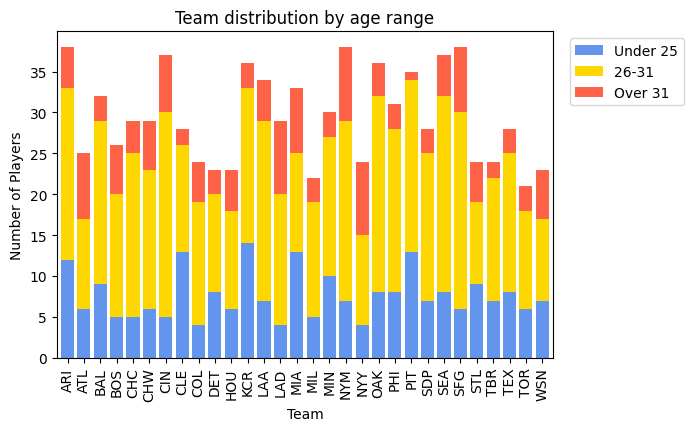

In [12]:
plt.figure(figsize=(20, 6))
bar_colors = ['cornflowerblue', 'gold', 'tomato' ]
combined_counts.plot(kind='bar', stacked=True, width=0.8, color=bar_colors)
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.title('Team distribution by age range')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.subplots_adjust(bottom=0.2)
plt.show()

# Show the chart

---
# There is any correlation between Strikeouts and HR/RBI?
- It is often observed that players who have more power and home run-hitting ability tend to have higher strikeout rates. When players try to hit the ball with more power, they may take bigger swings, increasing the likelihood of missing the ball and resulting in strikeouts.
- It's important to note that strikeouts can be influenced by various factors, including a ***player's approach at the plate, pitch recognition, plate discipline, and the pitching they face***
---
### There is not high correlation between this two variables, for better analysis will be useful to analyze swing and miss rates, contact percentages, and plate discipline metrics.

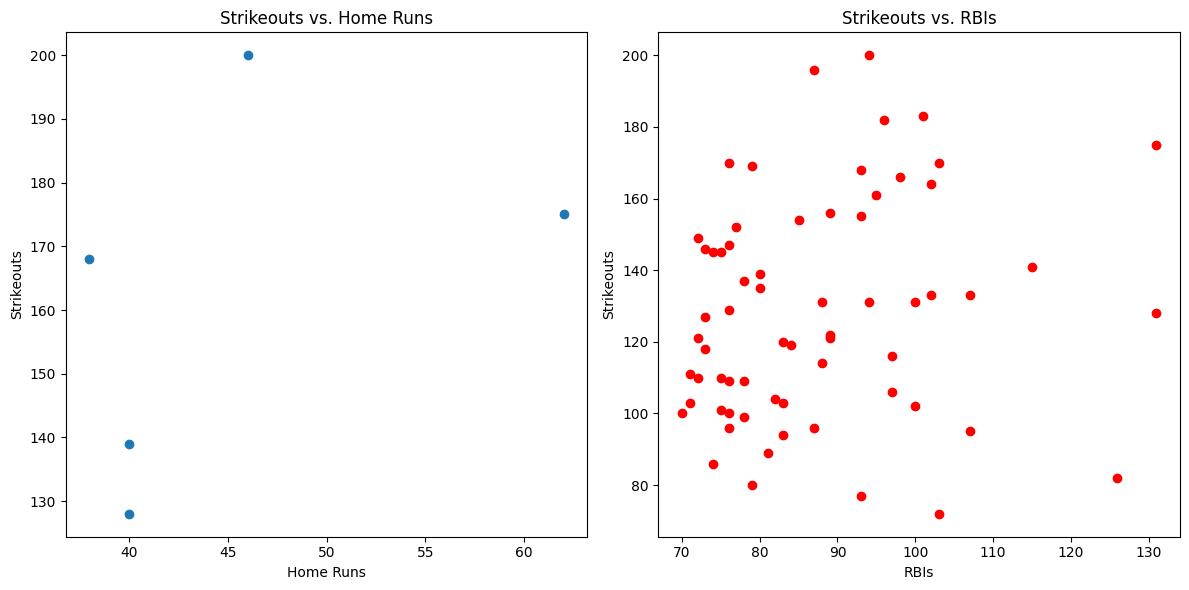

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for strikeouts vs. home runs
ax1.scatter(more_hr_players['hr'], more_hr_players['so'])
ax1.set_xlabel('Home Runs')
ax1.set_ylabel('Strikeouts')
ax1.set_title('Strikeouts vs. Home Runs')

# Scatter plot for strikeouts vs. RBIs
ax2.scatter(more_rbi_players['rbi'], more_rbi_players['so'], color= 'red')
ax2.set_xlabel('RBIs')
ax2.set_ylabel('Strikeouts')
ax2.set_title('Strikeouts vs. RBIs')

# Adjust spacing between subplots
plt.tight_layout()

# Display the combined scatter plots
plt.show()

In [20]:
strikeout_rate = more_hr_players['so'] / more_hr_players['pa'] * 100
average_strikeout_rate = strikeout_rate.mean()
average_ops = more_hr_players['ops'].mean()
strikeout_rate1 = more_rbi_players['so'] / more_rbi_players['pa'] * 100
average_strikeout_rate1 = strikeout_rate1.mean()
average_ops1 = more_rbi_players['ops'].mean()


print("Average Strikeout Rate for players with 30+ home runs:", average_strikeout_rate)
print("Average Strikeout Rate for players with 70+ RBIs:", average_strikeout_rate1)
print("Average OPS for players with 30+ home runs:", average_ops)
print("Average OPS for players with 70+ RBIs:", average_ops1)

Average Strikeout Rate for players with 30+ home runs: 25.16466228625739
Average Strikeout Rate for players with 70+ RBIs: 20.830665513246085
Average OPS for players with 30+ home runs: 0.9368000000000001
Average OPS for players with 70+ RBIs: 0.807876923076923


In [29]:

players_100g = baseball_sp[baseball_sp['g'] >= 100]

best_opb_players = players_100g[players_100g['obp'] >= 0.370]

best_ops_players = players_100g[players_100g['ops'] >= 0.900]

best_rbi_players = players_100g[players_100g['rbi'] >=70]

# Select the top 10 players based on OBP
#print(best_opb_players[['name','tm', 'so', 'rbi', 'obp', 'ops']])

# Select the top 10 players based on OPS
print(best_ops_players[['name','tm', 'so', 'rbi', 'obp', 'ops']])

# Select the top 10 players based on RBIs
print(best_rbi_players[['name','tm', 'so', 'rbi', 'ops', 'obp', 'h', 'g']])




                 name   tm   so  rbi    obp    ops
28        Jose Altuve  HOU   87   57  0.387  0.921
32     Yordan Alvarez  HOU  106   97  0.406  1.019
276   Freddie Freeman  LAD  102  100  0.407  0.918
302  Paul Goldschmidt  STL  141  115  0.404  0.981
405       Aaron Judge  NYY  175  131  0.425  1.111
813        Mike Trout  LAA  139   80  0.369  0.999
                 name   tm   so  rbi    ops    obp    h    g
3          José Abreu  CHW  110   75  0.824  0.378  183  157
5        Willy Adames  MIL  166   98  0.756  0.298  134  139
27        Pete Alonso  NYM  128  131  0.869  0.352  162  160
32     Yordan Alvarez  HOU  106   97  1.019  0.406  144  135
46      Nolan Arenado  STL   72  103  0.891  0.358  163  148
..                ...  ...  ...  ...    ...    ...  ...  ...
827    Daulton Varsho  ARI  145   74  0.745  0.302  125  151
828     Andrew Vaughn  CHW   96   76  0.750  0.321  138  134
834      Alex Verdugo  BOS   86   74  0.732  0.328  166  152
850  Christian Walker  ARI  131  

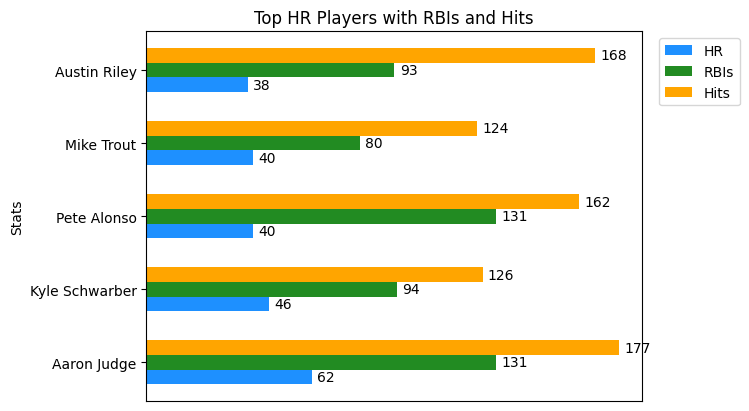

In [22]:
#more_hr_players =more_hr_players.sort_values('hr', ascending=False)

# Get the required columns for the bar chart
players = more_hr_players['name']
hr = more_hr_players['hr']
rbi = more_hr_players['rbi']
h = more_hr_players['h']
so = more_hr_players['so']
# Set up the figure and axes
fig, ax = plt.subplots()

# Create the bar chart
index = range(len(players))
bar_width = 0.2

# Plotting HR
hr_bars = ax.barh(index, hr, bar_width, label='HR', color='dodgerblue')

# Plotting RBI
rbi_bars = ax.barh([i + bar_width for i in index], rbi, bar_width, label='RBIs', color='forestgreen')

# Plotting Hits
h_bars = ax.barh([i + bar_width * 2 for i in index], h, bar_width, label='Hits', color='orange')
#so_bars = ax.barh([i + bar_width * 3 for i in index], so, bar_width, label='Strikeouts', color='purple')

# Set the x-axis tick positions and labels
ax.set_yticks([i + bar_width for i in index])
ax.set_yticklabels(players)
ax.set_xticks([])

def add_value_annotations(bars, distance):
    for bar in bars:
        width = bar.get_width()
        plt.text(width + distance, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center')

# Set the y-axis label
ax.set_ylabel('Stats')

# Set the title
ax.set_title('Top HR Players with RBIs and Hits')

# Display the legend
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
add_value_annotations(hr_bars, 2)

# Add value annotations to RBI bars
add_value_annotations(rbi_bars, 2)

# Add value annotations to OPS bars
add_value_annotations(h_bars, 2)
#add_value_annotations(so_bars, 2)


# Show the bar chart
plt.show()

# ***Top 30+ HRs Players with RBIs and Hits*** 
### Aaron judge, Kyle Schwarber, Austin Riley, Pete Alonso, Mike Trout
## I want to compare other stats to see how hard is to get this stats in a season.

In [17]:
pitch_totals = [

    ['Aaron Judge',
    'Kyle Schwarber',
    'Pete Alonso',
    'Mike Trout',
    'Austin Riley'],
    [ 2906,
     2878,
     2507,
     2105,
     2641],
     [25.1,
      29.9,
      18.7,
    	28,
        24.2]
]


averages = {}

# Iterate over the pitch totals
for i in range(len(pitch_totals[0])):
    player_name = pitch_totals[0][i]
    pitches = pitch_totals[1][i]

    # Retrieve the plate appearances for the current player from the DataFrame
    plate_appearances = baseball_sp[baseball_sp['name'] == player_name]['pa'].values[0]

    # Calculate the average pitches per plate appearance
    average_pitches = pitches / plate_appearances

    # Store the player name and average in the dictionary
    averages[player_name] = average_pitches

# Display the average pitches per plate appearance for each player
for player_name, average_pitches in averages.items():
    formatted_average = "{:.2f}".format(average_pitches)
    print(f"{player_name}: {formatted_average}")





Aaron Judge: 4.18
Kyle Schwarber: 4.30
Pete Alonso: 3.66
Mike Trout: 4.22
Austin Riley: 3.81


In [30]:
average_pitches_per_pa = 708540 / 182051
hard_hit_league = 38.4
exit_velocity_league = 88.6	
print(average_pitches_per_pa)

3.8919863115280884
